In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from hazm import *

from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

<div style="direction:rtl">
    <h2 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● خواندن دیتاست
    </h2>
</div>

In [2]:
df = pd.read_csv("vehicles.csv")
df.head()

,brand,category,created_at,description,image_count,mileage,price,title,year
0,NaN,heavy,Tuesday 07PM,سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...,4,NaN,-1,لودر کاتر پیلار 950,NaN
1,سایر,light,Wednesday 04AM,دوگانه ال پی جی بیمه با تخفیف دارد \nتودوزی نو...,3,180000.0,-1,پاترول شش سیلندر چهار درب,1366
2,پژو ۴۰۵::Peugeot 405,light,Wednesday 11AM,پژو 2000فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,0,290000.0,8500000,پژو مدل 81 مشکی,1381
3,نیسان::Nissan,light,Wednesday 01PM,سلام.\nماشین کاملا سالم همه چی فابریک متور زد ...,3,175000.0,19500000,پاترول 2در,1372
4,سمند::Samand,light,Thursday 07AM,سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...,4,80000.0,23900000,سمند دوگانه کارخانه,1391


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130443 entries, 0 to 130442
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   brand        120451 non-null  object 
 1   category     130443 non-null  object 
 2   created_at   130443 non-null  object 
 3   description  130443 non-null  object 
 4   image_count  130443 non-null  int64  
 5   mileage      120451 non-null  float64
 6   price        130443 non-null  int64  
 7   title        130443 non-null  object 
 8   year         120451 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 9.0+ MB


<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● اطلاعات کلی دیتاست، اعم از میانگین ستون های عددی، واریانس آنها، مقدار بیشینه و کمینه آنها و توزیع آنها
    </h3>
</div>

In [4]:
df.describe()

,image_count,mileage,price
count,130443.000000,120451.000000,1.304430e+05
mean,1.865527,100862.291944,2.224718e+07
std,1.471163,98368.470916,3.079805e+07
min,0.000000,0.000000,-1.000000e+00
25%,0.000000,19000.000000,7.400000e+06
50%,2.000000,75000.000000,1.450000e+07
75%,3.000000,160000.000000,2.500000e+07
max,14.000000,500000.000000,4.000000e+08


<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● بررسی اینکه چند درصد از داده های هر ستون Nan هستند!
    </h3>
</div>

In [5]:
def nanPercent(data, column):
    return data[column].isna().sum() / len(data[column]) * 100

columns = df.columns
for col in columns:
    print("Non-null", col, "=", nanPercent(df, col), "%")

Non-null brand = 7.660050750136074 %
Non-null category = 0.0 %
Non-null created_at = 0.0 %
Non-null description = 0.0 %
Non-null image_count = 0.0 %
Non-null mileage = 7.660050750136074 %
Non-null price = 0.0 %
Non-null title = 0.0 %
Non-null year = 7.660050750136074 %


<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● بررسی Correlation میان داده های عددی
    </h3>
</div>

<AxesSubplot:>

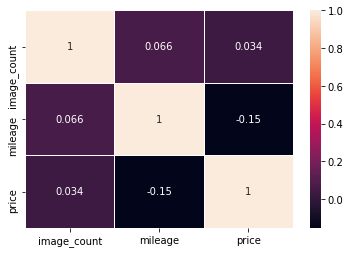

In [6]:
fig, ax = plt.subplots()
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax) 

<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● یکسان سازی تایپ داده های ستون year! به منظور حذف داده های NAN.
    </h3>
</div>

In [7]:
def correct_year_type(yearsStr):
    result = []
    for x in yearsStr:
        try:
            float(x)
            result.append(False)
        except TypeError:
            result.append(True)
        except ValueError:
            result.append(True)
    return result

In [8]:
df.loc[correct_year_type(df.year), 'year'] = 'NaN'
df['year'] = df['year'].astype(float)

<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● حذف داده های NAN ستون های عدد و جایگزینی آن با میانگین داده های آن ستون.
    </h3>
</div>
<br>
<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● سوال چهار
    </h3>
</div>
<div style="direction:rtl">
    <p style="font-family:B Nazanin; color:rgb(102, 102, 102); font-size: 20px; text-align: right">
  <br>ساده ترین روش، حذف داده های NAN است. روش دیگر و مرسوم تر، استفاده از میانگین مقادیر آن ستون به جای مقدارهای NAN است که من از این روش استفاده کردم.
</div>


In [9]:
mean_feature = ["mileage", "year"]
for feature in mean_feature:
    df[feature].fillna(df[feature].mean(), inplace = True)
    
df.isnull().sum()

brand          9992
category          0
created_at        0
description       0
image_count       0
mileage           0
price             0
title             0
year              0
dtype: int64

<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● تبدیل داده های نوعی به داده های عددی (با استفاده از LabelEncoder) و نیز حذف ستون created_at بعلت اینکه حاوی اطلاعات موثری برای طبقه بندی نمی باشد.
    </h3>
</div>
<br>
<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● سوال دو
    </h3>
</div>
<div style="direction:rtl">
    <p style="font-family:B Nazanin; color:rgb(102, 102, 102); font-size: 20px; text-align: right">
  <br>من از روش اختصاص دادن یک عدد یکتا به هر لیبل استفاده کردم. علت استفاده از این روش آن است که با توجه به پیش پردازشی که برای ستون های description و  title  انجام می دهیم، تعداد ستون ها زیاد می شود و استفاده از روش دیگر که به ازای هر لیبل یک ستون اضافه می کند، مجددا تعداد ستون ها را افزایش می دهد که این قطعا خوب نیست.
</div>


In [10]:
label_encoder = LabelEncoder()

#df_cat = df[['brand', 'category', 'created_at']]
df_cat = df[['brand', 'category']]
df_cat = df_cat.apply(LabelEncoder().fit_transform)

df = df.drop(['brand', 'category', 'created_at'], axis = 1)
df = pd.concat([df, df_cat], axis = 1)

In [11]:
df[feature].fillna(df['brand'].mean(), inplace = True)
df.isnull().sum()

description    0
image_count    0
mileage        0
price          0
title          0
year           0
brand          0
category       0
dtype: int64

In [12]:
stemmer = Stemmer()
normalizer = Normalizer()
lemmatizer = Lemmatizer()

whiteSpace = [':','::','؟','.',',','«','»','(',')','،','[',']','{','}','-','','؛', '#', '\r', '\n', 'یه', 'یک']
alphabet = ['ا', 'ب', 'پ', 'ت', 'ث', 'ج', 'چ', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'ژ', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ف', 'ق','ک','گ','ل','م','ن','و','ه','ی']
stopWord = [sw for sw in stopwords_list()]
stopWord.extend(whiteSpace)
stopWord.extend(alphabet)

In [13]:
def normalize_data_2(col):
    bag = [lemmatizer.lemmatize(stemmer.stem(word)) for word in word_tokenize(normalizer.normalize(col))]
    bag = list(filter(lambda word: word not in stopWord, bag))
    str1 = ""
    for ele in bag: 
        str1 += ele      
    return str1

def normalize_data(string):
    ret = ""
    for char in str(string):
        if char in alphabet:
            ret += char
        else:
            ret += ' '
    return ret

<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● نرمالسازی داده های ستون های description و title.
    </h3>
</div>

In [14]:
titleDf = pd.DataFrame(df['title'])
descDf = pd.DataFrame(df['description'])
df['title'] = titleDf.applymap(normalize_data)
df['description'] = descDf.applymap(normalize_data)

df

,description,image_count,mileage,price,title,year,brand,category
0,سریال بدون شکستگی سه حلقه لاستیک نو یک ...,4,100862.291944,-1,لودر کاتر پیلار,1387.849446,26,0
1,دوگانه ال پی جی بیمه با تخفیف دارد تودوزی نو ...,3,180000.000000,-1,پاترول شش سیلندر چهار درب,1366.000000,10,1
2,پژو فنی تازه تعمیر بدنه بدون خطو خش تخیف ب...,0,290000.000000,8500000,پژو مدل مشکی,1381.000000,23,1
3,سلام ماشین کاملا سالم همه چی فابریک متور زد ژ...,3,175000.000000,19500000,پاترول در,1372.000000,13,1
4,سمند ال ایکس بدون رنگ تمامی سرویس ها انجام شده...,4,80000.000000,23900000,سمند دوگانه کارخانه,1391.000000,11,1
...,...,...,...,...,...,...,...,...
130438,بادسان فوق بیرنگ سفید رنگ بیمه تابرج تخفی...,2,100862.291944,48000000,بادسان مدل,1387.849446,26,0
130439,باسلام تراکتورازصفری دست خودم بوده سالم ودارا...,4,100862.291944,-1,تراکتورگلدونی ایتالیا,1387.849446,26,0
130440,ماشینم تصادفیه با خریدار توافق میکنم سر قیمتش,3,20000.000000,-1,خودرو سمند تصادفی مدل,1392.000000,11,1
130441,سند برگ بیمه تا برج تخفیفات بیمه سال مع...,4,123000.000000,6900000,پراید بسیار سالم,1379.000000,17,1


<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● استفاده از روش count_vectorizer به منظور پیش پردازش داده های ستون های description و title.
    </h3>
</div>
<br>
<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● سوال سه
    </h3>
</div>
<div style="direction:rtl">
    <p style="font-family:B Nazanin; color:rgb(102, 102, 102); font-size: 20px; text-align: right">
  <br>ما برای پردازش داده های دو ستون مذکور از روش count_vectorizer استفاده کردیم. در ادامه نتایج استفاده از آن در df_desc و df_title قابل مشاهده است.
</div>


In [15]:
vectorizer = CountVectorizer(analyzer = 'word', ngram_range = (1, 1),
                             preprocessor= normalizer.normalize,
                             tokenizer = WordTokenizer().tokenize,
                             stop_words = stopWord, min_df = 100)

In [16]:
vectorized_desc = vectorizer.fit_transform(df['description'])
df_desc = pd.DataFrame(vectorized_desc.toarray(), columns = vectorizer.get_feature_names())
freq_desc = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)

vectorized_title = vectorizer.fit_transform(df['title'])
df_title = pd.DataFrame(vectorized_title.toarray(), columns = vectorizer.get_feature_names())
freq_title = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True)

In [17]:
title_names = []
desc_names = []

interval = int(min(len(freq_title), len(freq_desc))*0.3)
for i in range(interval):
    title_names.append(freq_title[i][0])
    desc_names.append(freq_desc[i][0])

df_title_ = df_title[title_names]
df_desc_ = df_desc[desc_names]

In [18]:
df_desc_

,یکماه,یکم,یکساله,یکسال,یکدستگاه,یورو,یو,ینه‌ها,ینه,ینده,...,کلاس,کلاج,کلا,کفی,کفپوش,کفه,کف,کشی,کشنده,کش
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130439,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130441,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● جایگذاری داده های پیش پردازش شده به جای داده های ستون های description و title.
    </h3>
</div>

In [19]:
df_final = df.drop(['description', 'title'], axis = 1)
df_final = df_final.join(df_title_)
df_final = df_final.join(df_desc_, lsuffix = '_l', rsuffix = '_r')

<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● آماده سازی داده های test و train.
    </h3>
</div>
<br>
<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● سوال پنج
    </h3>
</div>
<div style="direction:rtl">
    <p style="font-family:B Nazanin; color:rgb(102, 102, 102); font-size: 20px; text-align: right">
  <br> بنده از نسبت 20 به 80 برای تقسیم داده ها استفاده کردم و علت هم این بود که در کورس‌های مختلف دیده‌ام که درصد جداسازی P اگر حدود ۲۰ درصد باشد بسیار عالی است و این را به تجربه می‌گفتند. البته بستگی به تعداد دیتاهای موجود نیز دارد. قابل مشاهده است که با افزایش نسبت به 40 به 60، خطای پیش بینی کاهش  پیدا کرده. می توان گفت که تا قبل از این، مدل overfit شده بود و با کاهش سایز داده های آموزشی، اوضاع آن بهبود یافت. 
</div>

In [20]:
X = df_final.drop('price', axis=1)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 27)

<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● سوال یک
    </h3>
</div>
<div style="direction:rtl">
    <p style="font-family:B Nazanin; color:rgb(102, 102, 102); font-size: 20px; text-align: right">
  <br>این نمودارها اهمیت هر یک از Featureها در پیدا کردن قیمت را نشان می دهد یعنی می گوید کدام ویژگی مهم تر است و تاثیر بیشتری دارد. از این رو می توان ستون هایی را که تاثیر چندانی بر نتیجه ندارند را حذف کرد. متاسفانه، بنده موفق به اجرای این تکه کد نشدم و هربار پس از گذشت چندین دقیقه، کرنل restart میشد.
</div>

In [21]:
#mi = mutual_info_classif(X_train, y_train) 

In [22]:
portionOfData = 0.5
X_train_knn = X_train[::int(1//portionOfData)]
y_train_knn = y_train[::int(1//portionOfData)]

<p style = "font-size: 20px; color: #004080; font-family:Times New Roman;">● KNN</p>

In [23]:
errors = []

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train_knn, y_train_knn)
y_test_pred = knn.predict(X_test)

MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 800795897940443.6
RMSE score : 28298337.3706026


In [24]:
knn = KNeighborsRegressor(n_neighbors = 25)
knn.fit(X_train_knn, y_train_knn)
y_test_pred = knn.predict(X_test)

MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 771356141506760.8
RMSE score : 27773299.07495256


In [25]:
knn = KNeighborsRegressor(n_neighbors = 50)
knn.fit(X_train_knn, y_train_knn)
y_test_pred = knn.predict(X_test)

MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 780763616132980.2
RMSE score : 27942147.665005643


In [26]:
knn = KNeighborsRegressor(n_neighbors = 100)
knn.fit(X_train_knn, y_train_knn)
y_test_pred = knn.predict(X_test)

MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 798500641545263.8
RMSE score : 28257753.65355965


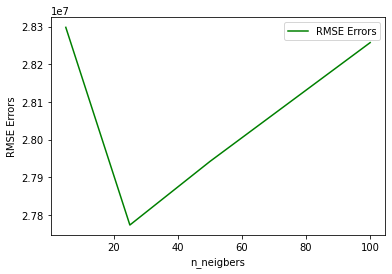

In [27]:
plt.plot([5, 25, 50, 100], errors, label='RMSE Errors', c='green')
plt.xlabel("n_neigbers")
plt.ylabel("RMSE Errors")
plt.legend()
plt.show()

<p style = "font-size: 20px; color: #004080; font-family:Times New Roman;">● Linear Regression</p>

In [28]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

MSE = mean_squared_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
print("MAE is", MAE)
print("RMSE is", MSE ** 0.5)

MAE is 13510357.87120668
RMSE is 26584979.91859796


In [29]:
X_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train, y_test))
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.02, random_state = 27)

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

MSE = mean_squared_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
print("MAE is", MAE)
print("RMSE is", MSE ** 0.5)

MAE is 13279180.411033763
RMSE is 25500523.87033573


In [31]:
X_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train, y_test))
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.4, random_state = 27)

In [32]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_test_pred = lr.predict(X_test)

MSE = mean_squared_error(y_test, y_test_pred)
MAE = mean_absolute_error(y_test, y_test_pred)
print("MAE is", MAE)
print("RMSE is", MSE ** 0.5)

MAE is 13441574.939063266
RMSE is 26727370.499116115


In [33]:
X_all = np.concatenate((X_train, X_test))
y_all = np.concatenate((y_train, y_test))
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 27)

<p style = "font-size: 20px; color: #004080; font-family:Times New Roman;">● Decision Tree</p>

In [34]:
errors = []
sec_errors = []

clf = tree.DecisionTreeRegressor()
clf.fit(X_train, y_train)

y_test_pred = clf.predict(X_test)

MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
errors.append(RMSE)
sec_errors.append(MSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 748294115091082.8
RMSE score : 27354965.090291794


In [35]:
clf = tree.DecisionTreeRegressor(min_samples_split=200, max_depth = 5)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
sec_errors.append(MSE)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 646860334029004.0
RMSE score : 25433449.11782521


In [36]:
clf = tree.DecisionTreeRegressor(min_samples_split=200, max_depth = 10)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
sec_errors.append(MSE)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 538802783646248.44
RMSE score : 23212125.789040703


In [37]:
clf = tree.DecisionTreeRegressor(min_samples_split=200, max_depth = 15)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
sec_errors.append(MSE)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 532604711957111.3
RMSE score : 23078230.260509823


In [38]:
clf = tree.DecisionTreeRegressor(min_samples_split=200, max_depth = 20)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
sec_errors.append(MSE)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 532546098034470.0
RMSE score : 23076960.329178322


In [39]:
clf = tree.DecisionTreeRegressor(min_samples_split=200, max_depth = 25)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
sec_errors.append(MSE)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 535964072993198.5
RMSE score : 23150897.887408137


In [40]:
clf = tree.DecisionTreeRegressor(min_samples_split=200, max_depth=50)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
sec_errors.append(MSE)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 542150821594241.8
RMSE score : 23284132.399431203


In [41]:
clf = tree.DecisionTreeRegressor(min_samples_split=200, max_depth=100)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
sec_errors.append(MSE)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 545498801106519.3
RMSE score : 23355915.76253261


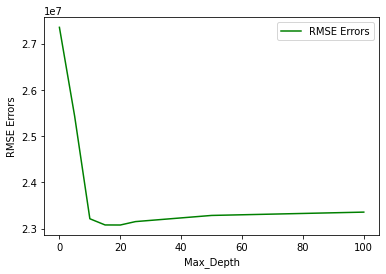

In [42]:
plt.plot([0, 5, 10, 15, 20, 25, 50, 100], errors, label='RMSE Errors', c='green')
plt.xlabel("Max_Depth")
plt.ylabel("RMSE Errors")
plt.legend()
plt.show()

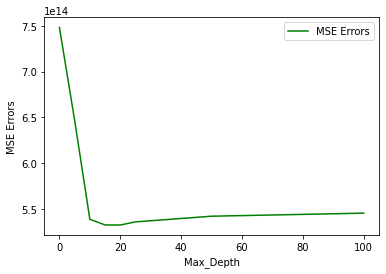

In [43]:
plt.plot([0, 5, 10, 15, 20, 25, 50, 100], sec_errors, label='MSE Errors', c='green')
plt.xlabel("Max_Depth")
plt.ylabel("MSE Errors")
plt.legend()
plt.show()

<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● سوال شش
    </h3>
</div>
<div style="direction:rtl">
    <p style="font-family:B Nazanin; color:rgb(102, 102, 102); font-size: 20px; text-align: right">
  <br> قبل از تغییر max_depth مقادیر متفاوتی برای min_samples_split امتخان شد و بهترین آن که 200 است انتخاب شد. حال با تغییر max_depth قابل  مشاهده است که از یکجایی به بعد که تقریبا عمق 15 است، دیگر افزایش عمق به کاهش خطا کمک نمی کند. بلکه به صورت جزیی افزایش نیز می یابد. 
</div>

<p style = "font-size: 20px; color: #004080; font-family:Times New Roman;">● Random Forest</p>

In [44]:
errors = []
clf = RandomForestRegressor(n_estimators=50, max_depth=10)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 529607916760661.9
RMSE score : 23013211.787159607


In [45]:
clf = RandomForestRegressor(n_estimators=50, max_depth=25)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 546041798730533.3
RMSE score : 23367537.284243997


In [46]:
clf = RandomForestRegressor(n_estimators=50, max_depth=50)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 572595134390479.8
RMSE score : 23928960.161078453


In [47]:
clf = RandomForestRegressor(n_estimators=50, max_depth=75)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
MSE = mean_squared_error(y_test, y_test_pred)
RMSE = mean_squared_error(y_test, y_test_pred, squared=False)
errors.append(RMSE)
print('MSE score :', MSE)
print('RMSE score :', RMSE)

MSE score : 578060996326013.4
RMSE score : 24042899.083222333


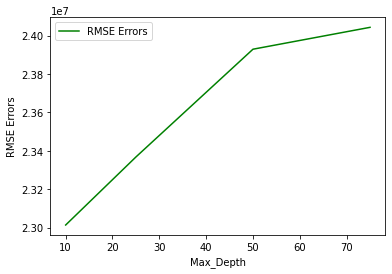

In [48]:
plt.plot([10, 25, 50, 75], errors, label='RMSE Errors', c='green')
plt.xlabel("Max_Depth")
plt.ylabel("RMSE Errors")
plt.legend()
plt.show()

<div style="direction:rtl">
    <h3 style="font-family:B Nazanin; color:rgb(26, 26, 26)">
    ● سوال هفت
    </h3>
</div>
<div style="direction:rtl">
    <p style="font-family:B Nazanin; color:rgb(102, 102, 102); font-size: 20px; text-align: right">
  <br> مفهوم بایاس و واریانس با میزان پیچیدگی ارتباط دارد. بایاس بالا به معنی سادگی بیش از حد دسته بندی و underfitting و واریانس بالا به معنای پیچیدگی زیاد و overfitting است. با توجه به اینکه داده های ورودی خود واریانس بالایی دارند، شاید آنقدر هم استفاده از این الگوریتم به افزایش بهره وری کمک نکند. کااینکه نتایج هم این حرف را تایید می کند. 
</div>